In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as nn

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

In [3]:
xy  = np.c_[x,y]

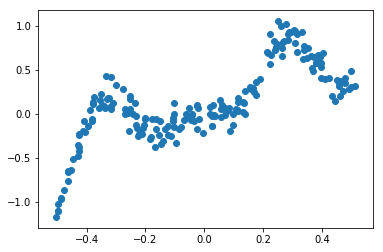

In [4]:
plt.scatter(x, y)

In [5]:
# Architecture defination
aeoptim = nn.Adam(0.01)
layer1 = nn.LinearLayer(2, 1, optimizer=aeoptim)
layer2 = nn.LinearLayer(1, 2, optimizer=aeoptim)

In [6]:
def ae_forward(x):
    a1 = layer1.forward(x)
    a2 = layer2.forward(a1)
    return a1, a2

def ae_backward(dy):
    da1 = layer2.backward(dy)
    dx = layer1.backward(da1)
    return da1, dx

def ae_update():
    layer1.update()
    layer2.update()

_______________________
epoch 0
Loss 0.5451716401545726


_______________________
epoch 100
Loss 0.07924039728985992


_______________________
epoch 200
Loss 0.06746085710574881


_______________________
epoch 300
Loss 0.06089004269144414


_______________________
epoch 400
Loss 0.05311705235472042


_______________________
epoch 500
Loss 0.032252184510328456


_______________________
epoch 600
Loss 0.011516929158613062


_______________________
epoch 700
Loss 0.007980130476275403


_______________________
epoch 800
Loss 0.0073597709484815275


_______________________
epoch 900
Loss 0.007225916149452782


_______________________
epoch 1000
Loss 0.007199821753043362


_______________________
epoch 1100
Loss 0.00719545463763386


_______________________
epoch 1200
Loss 0.007194835398541035


_______________________
epoch 1300
Loss 0.007194761685227445


_______________________
epoch 1400
Loss 0.00719475438547233


_______________________
epoch 1500
Loss 0.007194753789994894


___________

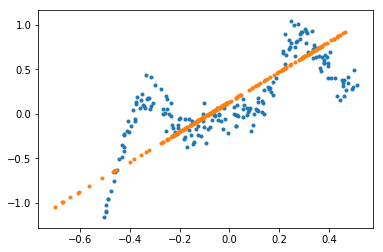

In [7]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1, a2 = ae_forward(xy)
    
    loss = nn.MseLoss.loss(a2, xy)
    dy = nn.MseLoss.del_loss(a2, xy)
    
    da1, dx = ae_backward(dy)
    
    ae_update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(xy[:,0], xy[:,1], marker='.')
        plt.scatter(a2[:,0], a2[:,1], marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

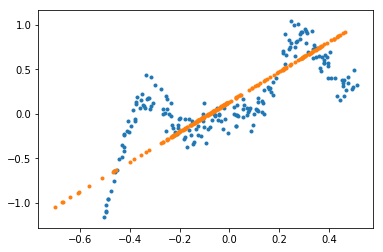

In [9]:
%matplotlib inline
plt.scatter(xy[:,0], xy[:,1], marker='.')
plt.scatter(a2[:,0], a2[:,1], marker='.')